In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the mall dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:,[3,4]].values

In [5]:
X.shape

(200, 2)

In [6]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []       # wcss is the within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

Text(0, 0.5, 'WCSS')

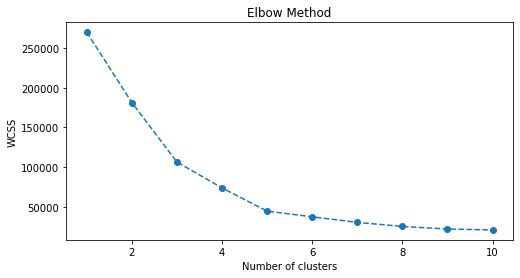

In [7]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")

In [8]:
#Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0, 0.5, 'Spending Score(1-100)')

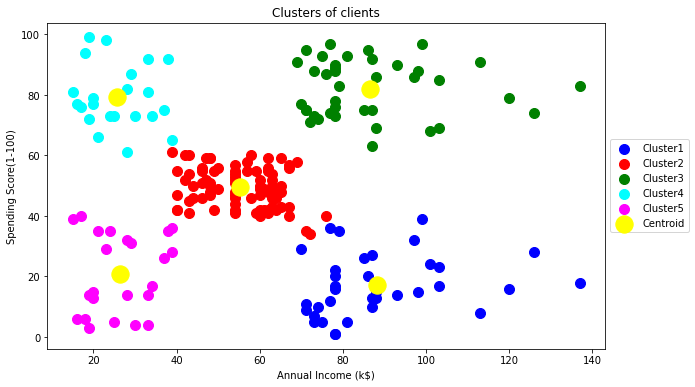

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s = 100, c='blue', label='Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s = 100, c='red', label='Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s = 100, c='green', label='Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s = 100, c='cyan', label='Cluster4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s = 100, c='magenta', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 300,c='yellow',label='Centroid')
plt.legend(loc = 'center left',bbox_to_anchor=(1.0,0.5))
plt.title('Clusters of clients')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")

In [11]:
X[y_kmeans==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [12]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

Text(0, 0.5, 'Spending Score(1-100)')

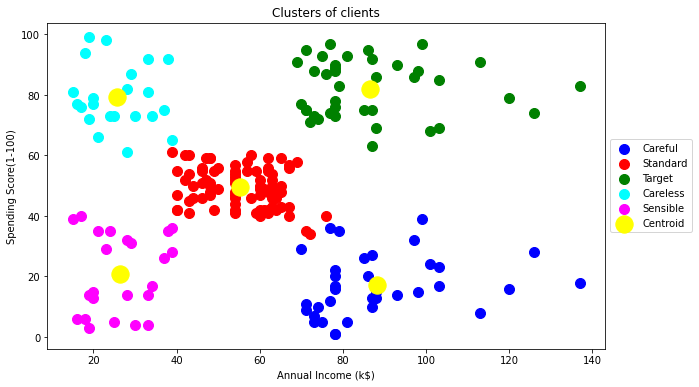

In [13]:
# Labelling the customers according to their salary and spending score

plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s = 100, c='blue', label='Careful')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s = 100, c='red', label='Standard')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s = 100, c='green', label='Target')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s = 100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s = 100, c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 300,c='yellow',label='Centroid')
plt.legend(loc = 'center left',bbox_to_anchor=(1.0,0.5))
plt.title('Clusters of clients')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")